In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('Influencer.csv')

In [3]:
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [5]:
df.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers               object
Avg. Likes              object
Posts                   object
60-Day Eng Rate        float64
New Post Avg. Likes     object
Total Likes             object
Country Or Region       object
dtype: object

In [6]:
df.describe()

,Rank,Influence Score,60-Day Eng Rate
count,200.000000,200.000000,200.000000
mean,100.500000,81.850000,0.019160
std,57.879185,8.875323,0.032577
min,1.000000,22.000000,0.000000
25%,50.750000,80.000000,0.004000
50%,100.500000,84.000000,0.009500
75%,150.250000,86.000000,0.017250
max,200.000000,93.000000,0.250000


In [7]:
df.nunique()

Rank                   200
Channel Info           200
Influence Score         32
Followers              172
Avg. Likes             134
Posts                  121
60-Day Eng Rate         53
New Post Avg. Likes    170
Total Likes            116
Country Or Region       25
dtype: int64

In [8]:
df.shape

(200, 10)

In [9]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Rank  Channel Info  Influence Score  Followers  Avg. Likes  Posts  \
0    False         False            False      False       False  False   
1    False         False            False      False       False  False   
2    False         False            False      False       False  False   
3    False         False            False      False       False  False   
4    False         False            False      False       False  False   
..     ...           ...              ...        ...         ...    ...   
195  False         False            False      False       False  False   
196  False         False            False      False       False  False   
197  False         False            False      False       False  False   
198  False         False            False      False       False  False   
199  False         False            False      False       False  False   

     60-Day Eng Rate  New Post Avg. L

### Data Visualization

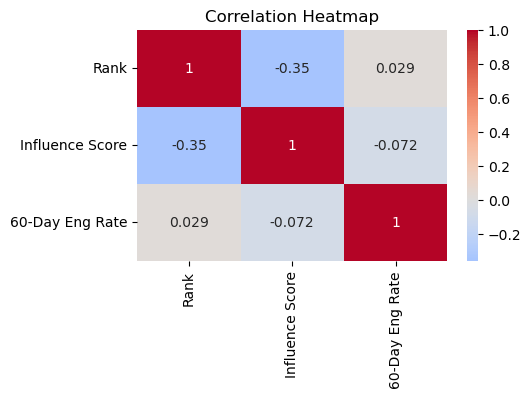

In [10]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


#### Answer the following questions based on the given data set:

###### 1.Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated

In [11]:
# Calculate correlation matrix
correlation_matrix = df.corr()

In [12]:
df.corr()

,Rank,Influence Score,60-Day Eng Rate
Rank,1.000000,-0.354843,0.02890
Influence Score,-0.354843,1.000000,-0.07246
60-Day Eng Rate,0.028900,-0.072460,1.00000


###### 2.What is the frequency distribution of the following features?

                    * Influence Score

                    * Followers

                    * Posts

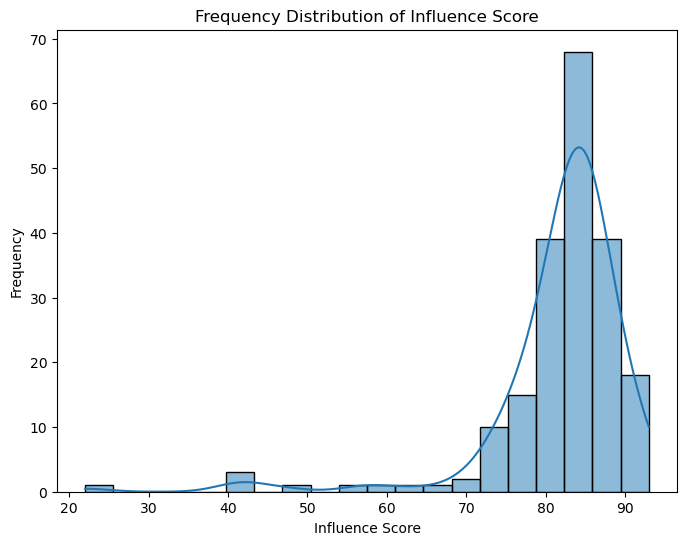

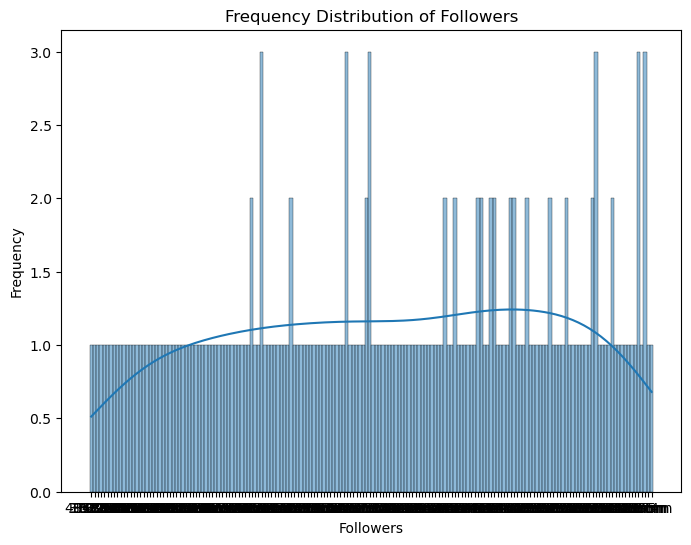

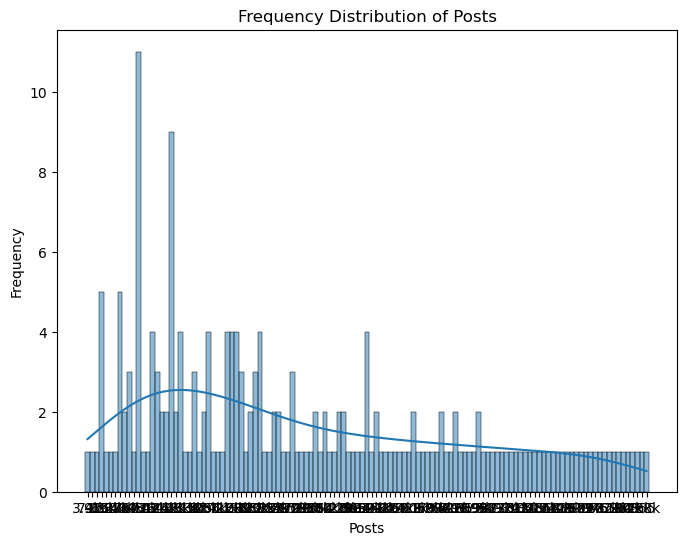

In [13]:
# Frequency distribution of selected features
features_to_plot = ['Influence Score', 'Followers', 'Posts']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Frequency Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


###### 3.Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart


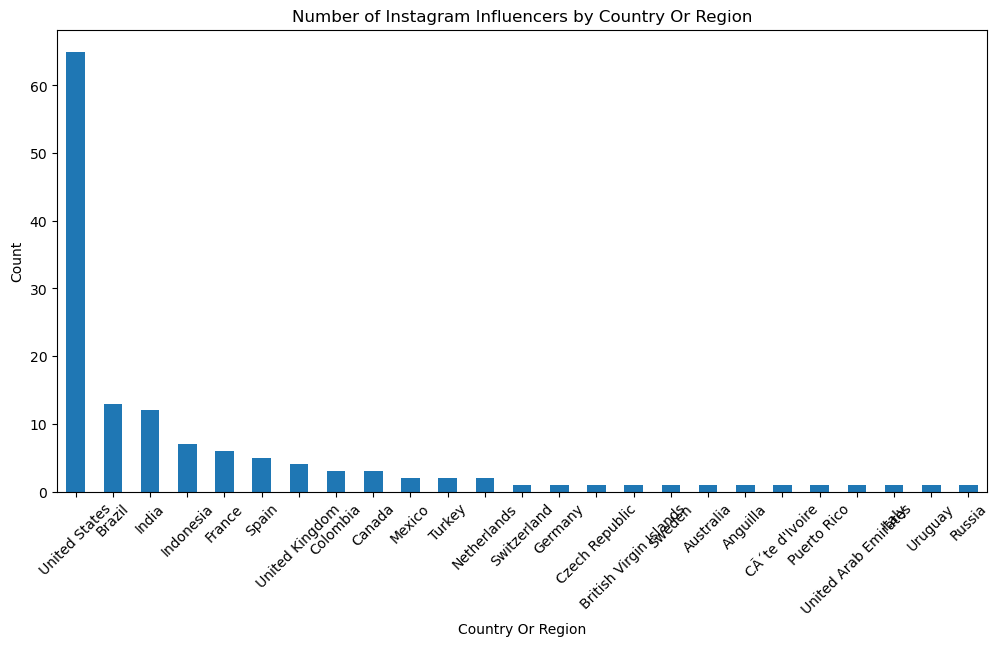

In [14]:
# Count of Instagram influencers by Country Or Region
country_or_region_counts = df['Country Or Region'].value_counts()
plt.figure(figsize=(12, 6))
country_or_region_counts.plot(kind='bar')
plt.title('Number of Instagram Influencers by Country Or Region')
plt.xlabel('Country Or Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


###### 4.Who are the top 10 influencers in the given dataset based on the following features

                     ● Followers

                     ● Average likes

                     ● Total Likes

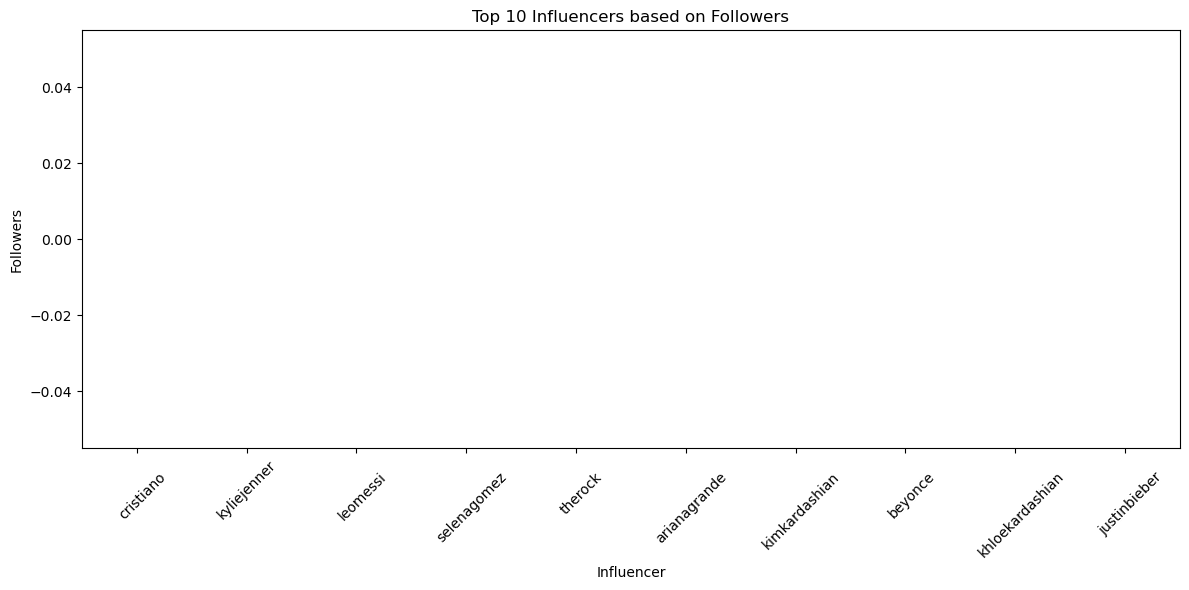

In [15]:
# Convert 'followers' column to numeric data type
df['Followers'] = pd.to_numeric(df['Followers'], errors='coerce')

# Top 10 influencers based on Followers
top_10_followers = df.nlargest(10, 'Followers')

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_followers['Channel Info'], y=top_10_followers['Followers'])
plt.title('Top 10 Influencers based on Followers')
plt.xlabel('Influencer')
plt.ylabel('Followers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###### 5.Describe the relationship between the following pairs of features using a suitable graph

                     ● Followers and Total Likes

                     ● Followers and Influence Score

                     ● Posts and Average likes

                     ● Posts and Influence Score

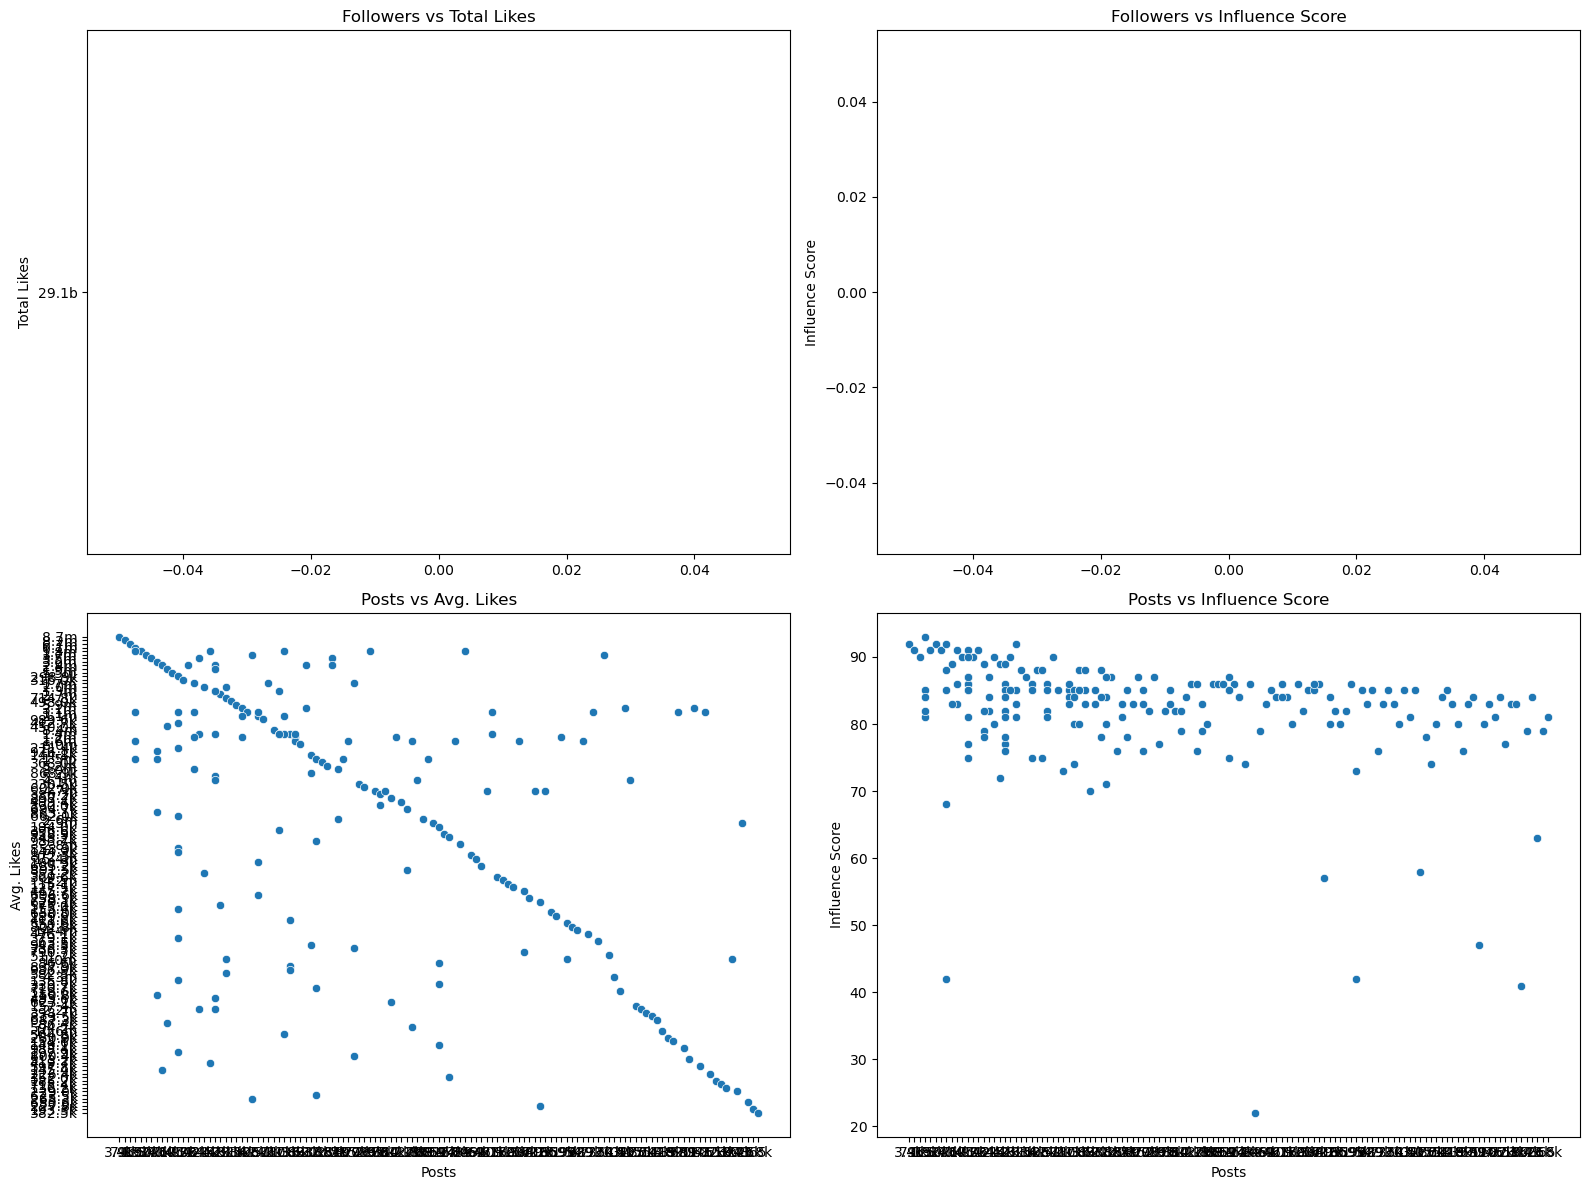

In [16]:
# Convert 'followers' column to numeric data type
df['Followers'] = pd.to_numeric(df['Followers'], errors='coerce')

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Followers', y='Total Likes', data=df)
plt.title('Followers vs Total Likes')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Followers', y='Influence Score', data=df)
plt.title('Followers vs Influence Score')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Posts', y='Avg. Likes', data=df)
plt.title('Posts vs Avg. Likes')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Posts', y='Influence Score', data=df)
plt.title('Posts vs Influence Score')

plt.tight_layout()
plt.show()